In [105]:
library(ggplot2)
library(scales)
library(viridis)
options(repr.plot.height=6, repr.plot.width=10)

In [106]:
df = read.csv('data_cleaned.csv')

Fit an exponential model

In [107]:
world = df[df$Partner=="World",];

In [108]:
model = lm(log(quant) ~ date, data=world);
pred = data.frame(date=world$date);

In [109]:
pred2022 = data.frame(date=2022);
pred = rbind(pred, pred2022);

In [110]:
pred[c("quant", "lwr90", "upr90")] = apply(predict(model, newdata=pred, interval="prediction", level = 0.90), 2, exp);

In [111]:
pred[c("quant", "lwr70", "upr70")] = apply(predict(model, newdata=pred, interval="prediction", level = 0.70), 2, exp);

In [112]:
pred[c("quant", "lwr50", "upr50")] = apply(predict(model, newdata=pred, interval="prediction", level = 0.50), 2, exp);

In [115]:
pred[c("quant", "lwr20", "upr20")] = apply(predict(model, newdata=pred, interval="prediction", level = 0.20), 2, exp);

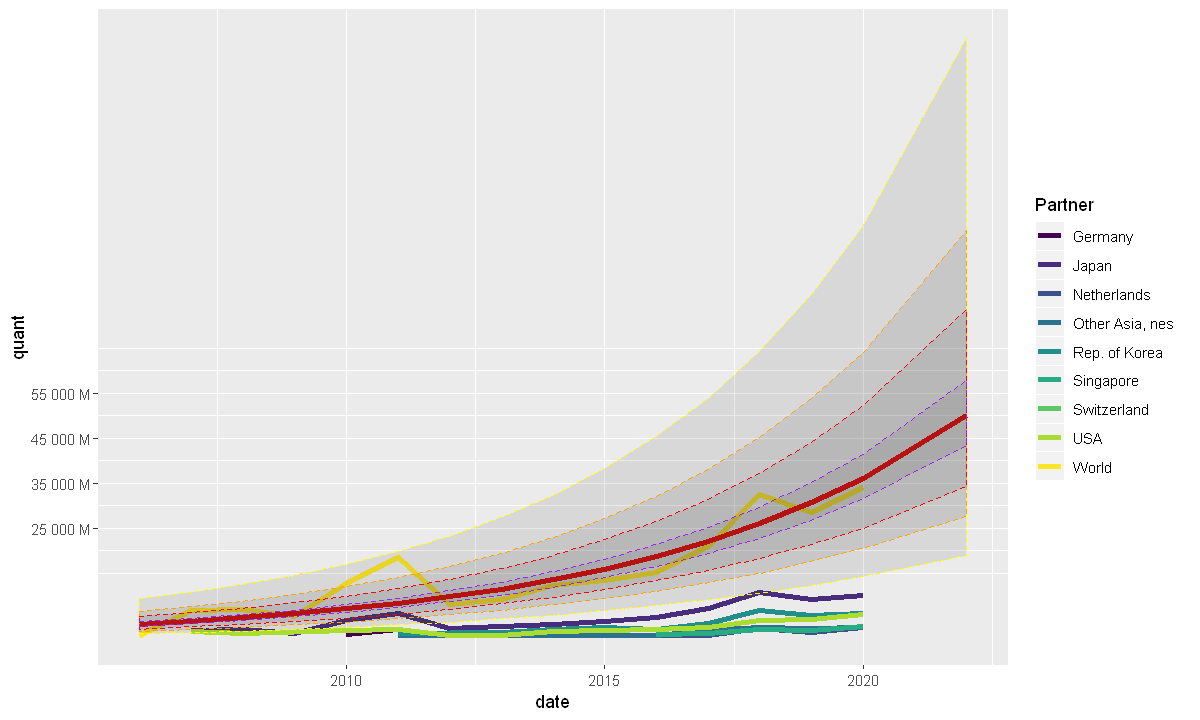

In [116]:
ggplot(df, aes(date, quant)) + 
geom_line(aes(color=Partner), size=1.5) + 
geom_line(data=pred, aes(date, quant), size=1.5, color="red") +
geom_ribbon(data=pred, aes(ymin=lwr90, ymax=upr90), linetype=2, alpha=0.1, color="yellow") +
geom_ribbon(data=pred, aes(ymin=lwr70, ymax=upr70), linetype=2, alpha=0.1, color="orange") +
geom_ribbon(data=pred, aes(ymin=lwr50, ymax=upr50), linetype=2, alpha=0.1, color="red") +
geom_ribbon(data=pred, aes(ymin=lwr20, ymax=upr20), linetype=2, alpha=0.1, color="purple") +
scale_y_continuous(labels = unit_format(unit="M", scale=1e-6), breaks=c(25e9, 35e9, 45e9, 55e9)) +
scale_color_viridis(discrete=TRUE)

In [135]:
summary(model);


Call:
lm(formula = log(quant) ~ date, data = world)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16791 -0.18828 -0.07286  0.27507  0.80610 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -307.64031   57.26931  -5.372 0.000127 ***
date           0.16433    0.02845   5.776 6.42e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4761 on 13 degrees of freedom
Multiple R-squared:  0.7196,	Adjusted R-squared:  0.698 
F-statistic: 33.36 on 1 and 13 DF,  p-value: 6.423e-05


fit a linear model

In [126]:
world = df[df$Partner=="World",];

In [127]:
lin.model = lm(quant ~ date, data=world);
lin.pred = data.frame(date=world$date);

In [128]:
lin.pred2022 = data.frame(date=2022);
lin.pred = rbind(lin.pred, lin.pred2022);

In [129]:
lin.pred[c("quant", "lwr90", "upr90")] = predict(lin.model, newdata=lin.pred, interval="prediction", level = 0.90);

In [130]:
lin.pred[c("quant", "lwr70", "upr70")] = predict(lin.model, newdata=lin.pred, interval="prediction", level = 0.70);

In [131]:
lin.pred[c("quant", "lwr50", "upr50")] = predict(lin.model, newdata=lin.pred, interval="prediction", level = 0.50);

In [132]:
lin.pred[c("quant", "lwr20", "upr20")] = predict(lin.model, newdata=lin.pred, interval="prediction", level = 0.20);

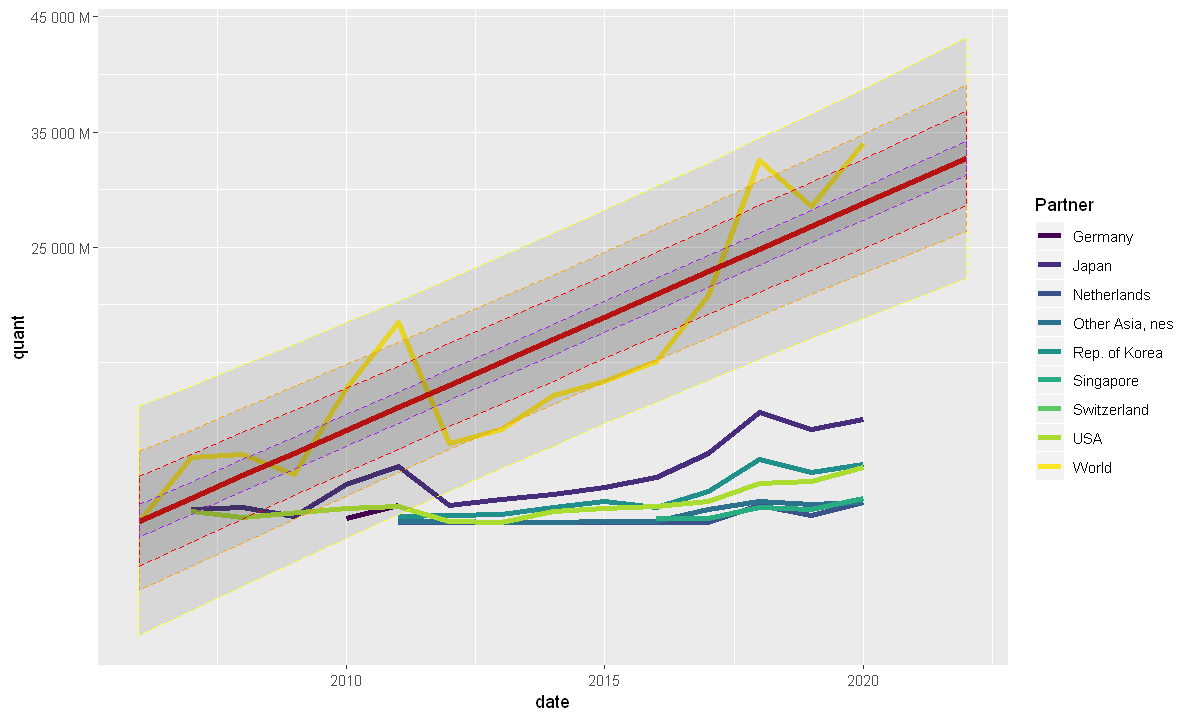

In [133]:
ggplot(df, aes(date, quant)) + 
geom_line(aes(color=Partner), size=1.5) + 
geom_line(data=lin.pred, aes(date, quant), size=1.5, color="red") +
geom_ribbon(data=lin.pred, aes(ymin=lwr90, ymax=upr90), linetype=2, alpha=0.1, color="yellow") +
geom_ribbon(data=lin.pred, aes(ymin=lwr70, ymax=upr70), linetype=2, alpha=0.1, color="orange") +
geom_ribbon(data=lin.pred, aes(ymin=lwr50, ymax=upr50), linetype=2, alpha=0.1, color="red") +
geom_ribbon(data=lin.pred, aes(ymin=lwr20, ymax=upr20), linetype=2, alpha=0.1, color="purple") +
scale_y_continuous(labels = unit_format(unit="M", scale=1e-6), breaks=c(25e9, 35e9, 45e9, 55e9)) +
scale_color_viridis(discrete=TRUE)

In [134]:
summary(lin.model);


Call:
lm(formula = quant ~ date, data = world)

Residuals:
       Min         1Q     Median         3Q        Max 
-5.852e+09 -4.917e+09 -5.757e+07  3.617e+09  7.698e+09 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.951e+12  6.059e+11  -6.521 1.94e-05 ***
date         1.970e+09  3.010e+08   6.545 1.87e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.037e+09 on 13 degrees of freedom
Multiple R-squared:  0.7672,	Adjusted R-squared:  0.7493 
F-statistic: 42.84 on 1 and 13 DF,  p-value: 1.867e-05
